# PDK Components

Components are individual building blocks that make photonic integrated circuits.
Components could be as simple as a straight waveguide or as complex as an optical phase array with thousands of active and passive sub-components.
In PhotonForge, all devices are represented by a [Component](../_autosummary/photonforge.Component.rst) object, and are described by 2D layouts that can be easily exported to [GDSII](../_autosummary/photonforge.Component.rst#photonforge.Component.write_gds) or [OASIS](../_autosummary/photonforge.Component.rst#photonforge.Component.write_oas) files.

[Technologies](Technology.ipynb) in PhotonForge represent a foundry PDK, and they can include a library of components, either represented by a fixed geometry layout or as a parametric component function (or even as a *black-box*, that does not disclose the physical layout of the component, but offers a model for simulation).
Accessing the components of a PDK library can vary from one library to another, but the general idea is exemplified in this How-To.

We will use the [SiEPIC OpenEBL](https://siepic.ca/openebl/) PDK through the `siepic_forge` module, which includes both a parametric [technology](../_autosummary/photonforge.Technology.rst) functions and fixed library components that we want to use.

In [1]:
import photonforge as pf
import siepic_forge as siepic

# Set the default technology for this project from the PDK library
pf.config.default_technology = siepic.ebeam()

## Available Components

The `siepic_forge` module lists all available component names in the `component_names` module attribute:

In [2]:
siepic.component_names

{'ANT_MMI_1x2_te1550_3dB_BB',
 'GC_SiN_TE_1550_8degOxide_BB',
 'GC_TE_1310_8degOxide_BB',
 'GC_TE_1550_8degOxide_BB',
 'GC_TM_1310_8degOxide_BB',
 'GC_TM_1550_8degOxide_BB',
 'ebeam_BondPad',
 'ebeam_DC_2-1_te895',
 'ebeam_DC_te895',
 'ebeam_MMI_2x2_5050_te1310',
 'ebeam_YBranch_895',
 'ebeam_YBranch_te1310',
 'ebeam_adiabatic_te1550',
 'ebeam_adiabatic_tm1550',
 'ebeam_bdc_te1550',
 'ebeam_crossing4',
 'ebeam_gc_te1550',
 'ebeam_gc_te895',
 'ebeam_gc_tm1550',
 'ebeam_splitter_swg_assist_te1310',
 'ebeam_splitter_swg_assist_te1550',
 'ebeam_terminator_SiN_1550',
 'ebeam_terminator_SiN_te895',
 'ebeam_terminator_te1310',
 'ebeam_terminator_te1550',
 'ebeam_terminator_tm1550',
 'ebeam_y_1550',
 'ebeam_y_adiabatic',
 'ebeam_y_adiabatic_500pin',
 'taper_SiN_750_3000',
 'taper_si_simm_1310',
 'taper_si_simm_1550'}

Here we see that this PDK contains various components like grating couplers, splitters, couplers, and so on at both O and C band.

We can easily load one of those components for use in our project with the `component` function:

In [3]:
y_branch = siepic.component("ebeam_y_1550")
y_branch

The component already includes [ports for connection](Ports.ipynb) and models, which we can inspect:

In [4]:
y_branch.models

{'Tidy3D': Tidy3DModel(run_time=None, medium=None, symmetry=(0, 0, 0), boundary_spec=None, monitors=(), structures=(), grid_spec=None, shutoff=1e-05, subpixel=True, courant=0.99, port_symmetries=[('P1', 'P2', {'P0': 'P0', 'P2': 'P1', 'P1': 'P2'})], bounds=((None, None, None), (None, None, None)), verbose=True)}

If we check the help from the `component` function, we'll see that we can also provide extra keyword arguments for the component model we're creating:

In [5]:
siepic.component?

Let's load another component and pass a model keyword argument to it:

In [6]:
crossing = siepic.component("ebeam_crossing4", tidy3d_model_kwargs={"verbose": False})
crossing

## Component Simulation

Because they already include ports and models, simulating a library component is usually very straightforward.
Here we use the [plot_s_matrix](../_autosummary/photonforge.plot_s_matrix.rst) helper function to quickly compute and plot the scattering parameters for the cross.

Starting...
Progress: 100% 


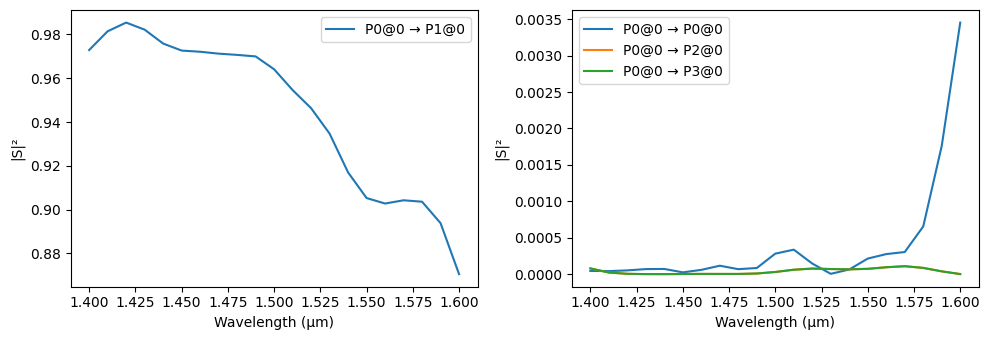

In [7]:
import numpy as np

s_matrix = crossing.s_matrix(pf.C_0 / np.linspace(1.4, 1.6, 21))
_ = pf.plot_s_matrix(s_matrix, input_ports=["P0"])

These components form the basic building blocks which can be used to create complex photonic integrated circuits.